In [1]:
import pandas as pd
import pickle

In [2]:
# Assuming you have loaded your data_text and df_feature_extraction (with 'class_prediction' column)

# Load the TF-IDF model (if previously saved)
try:
    with open('TFIDF Model - 80 Final.pkl', 'rb') as f:
        tfidf = pickle.load(f)
except FileNotFoundError:
    print("TF-IDF model not found. Please train and save it first.")
    exit()


In [3]:
df_train = pd.read_csv('./Dataset Predict Result - Train.csv')
df_test = pd.read_csv('./Dataset Predict Result - Test.csv')


In [4]:
# load the data 
df_full = pd.concat([df_train, df_test], ignore_index=True)
df_full['tfidf'] = df_full['text_clean'].apply(lambda x: tfidf.transform(x))
df_full


,text,label,category_id,text_clean,class_prediction,tfidf
0,barang sudah saya terima thanks,Layanan Pelanggan,1,barang terima thanks,Product,"[0.2777177843336796, 0.5794235947590229, 0.728..."
1,Fast ResponseFriendly Recommended Seller,Layanan Pelanggan,1,fast responsefriendly recommended seller,Customer Service,"[0.0, 0.0, 0.0, 0.7253553985206874, 1.67702102..."
2,Seller fast respon Produk sudah diterima buat ...,Layanan Pelanggan,1,seller fast respon produk terima stok thanks,Customer Service,"[0.0, 0.24832439775386697, 0.31232792954343275..."
3,mantap gan. laen kali pesen langsung,Layanan Pelanggan,1,mantap gan laen kali sen langsung,Customer Service,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Fast respon dan barangnya mulus sip,Layanan Pelanggan,1,fast respon barang mulus sip,Customer Service,"[0.16663067060020778, 0.0, 0.0, 0.580284318816..."
...,...,...,...,...,...,...
1019,Barang murah tapi gak murahan,Produk,0,barang murah gak murah,Product,"[0.20828833825025972, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1020,Thanks gan barang sudah sampai packing rapi be...,Layanan Pelanggan,1,thanks gan barang packing rapi fungsi baik,Customer Service,"[0.11902190757157698, 0.0, 0.31232792954343275..."
1021,Keren jam nya thanks flash sale,Produk,0,keren jam nya thanks flash sale,Customer Service,"[0.0, 0.0, 0.3643825844673382, 0.0, 0.0, 0.0, ..."
1022,analog kiri gak berfungsi gan.,Produk,0,analog kiri gak fungsi gan,Product,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [24]:
tfidf.word_list


['barang',
 'terima',
 'thanks',
 'fast',
 'responsefriendly',
 'recommended',
 'seller',
 'respon',
 'produk',
 'stok',
 'mantap',
 'gan',
 'laen',
 'kali',
 'sen',
 'langsung',
 'mulus',
 'sip',
 'bagus',
 'on',
 'off',
 'switch',
 'port',
 'kabel',
 'panjang',
 'sesuai',
 'deskripsi',
 'tippp',
 'memuaskann',
 '3',
 'beli',
 'puas',
 'sellerer',
 'yuhuuu',
 'bagi',
 'flash',
 'sale',
 'ya',
 'warna',
 'kemas',
 'rapi',
 'aman',
 'banget',
 'dapet',
 'merek',
 'k-one',
 'pakai',
 'untuk',
 'main',
 'zelda',
 'breath',
 'of',
 'the',
 'wild',
 'pc',
 'tombol',
 'fungsi',
 'baik',
 'kasih',
 'kualitas',
 'kirim',
 'cepat',
 'harga',
 'cmn',
 'klick',
 'kiri',
 'nempel',
 'pas',
 'pencet',
 'gpp',
 'good',
 'luar',
 'biasa',
 'kemaren',
 'bayar',
 'hari',
 'sampai',
 'sukses',
 'terus',
 'layan',
 'ramah',
 'kaki',
 'lima',
 'meikarata',
 'tuju',
 'harap',
 'cengli',
 'jossssssssss',
 'recommend',
 'paket',
 'manfaat',
 'kecewa',
 'response',
 'vgak',
 'packing',
 'ok',
 'hatur',
 'nuhu

In [18]:
import pandas as pd
import numpy as np
import pickle

# Function to get top N significant words per class
def get_top_words_per_class(df, tfidf_model, class_column_name,  num_words=10):
    top_words = {}
    unique_classes = df[class_column_name].unique()

    for class_label in unique_classes:
        class_data = df[df[class_column_name] == class_label]
        # tfidf_matrix is from column 0 to -1 (excluding the class_prediction column)
        tfidf_matrix   = class_data['tfidf'].values
        
        # Efficiently calculate average TF-IDF across documents in the class
        average_tfidf = np.mean(tfidf_matrix, axis=0)

        # Extract top N word indices and corresponding words
        top_indices = np.argsort(average_tfidf)[::-1][:num_words]
        # print("type top indices", type(top_indices))
        # print("top indices", top_indices)
        top_words_list = np.array(tfidf_model.word_list)[top_indices]
        # print("type top words list", type(top_words_list))
        # print("top words list", top_words_list)
        top_values_list = average_tfidf[top_indices]

        # Store words and their corresponding values in a dictionary
        top_words_values = {word: value for word, value in zip(top_words_list, top_values_list)}
        top_words[class_label] = top_words_values

    return top_words

# Get top words (modify 'class_prediction' if it's a different column name)
top_words_per_class = get_top_words_per_class(df_full, tfidf, 'class_prediction')

# Print or visualize the results
print("Top words per class:")
for class_label, top_words in top_words_per_class.items():
    print(f"\nClass: {class_label}")
    for word, value in top_words.items():
        print(f"{word}: {value}")

# You can further customize the visualization using libraries like matplotlib or seaborn


top words list ['bagus' 'sesuai' 'mantap' 'barang' 'produk' 'baik' 'deskripsi' 'terima'
 'fungsi' 'harga']
top words list ['respon' 'cepat' 'barang' 'seller' 'fast' 'rapi' 'gan' 'recommended'
 'kirim' 'mantap']
top words list ['cepat' 'kirim' 'terima' 'selamat' 'barang' 'kasih' 'aman' 'coba'
 'sampai' 'fungsi']
Top words per class:

Class: Product
bagus: 0.08822866711376512
sesuai: 0.08082843904028486
mantap: 0.05956482333353484
barang: 0.05645218045859452
produk: 0.05169448234872483
baik: 0.05042018082267267
deskripsi: 0.047033495806530816
terima: 0.04359403957480124
fungsi: 0.04112511854000211
harga: 0.0393164073157111

Class: Customer Service
respon: 0.08489104501770926
cepat: 0.08005070069623975
barang: 0.07574351689666894
seller: 0.07318920568294969
fast: 0.06868582752914361
rapi: 0.06190565063210924
gan: 0.05862466820656106
recommended: 0.05629651664976674
kirim: 0.05115519379821415
mantap: 0.048919628903796586

Class: Shipping/Delivery
cepat: 0.15582899394875652
kirim: 0.1184428


Class: Product


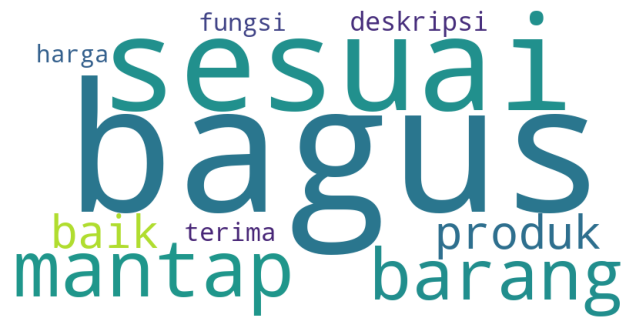


Class: Customer Service


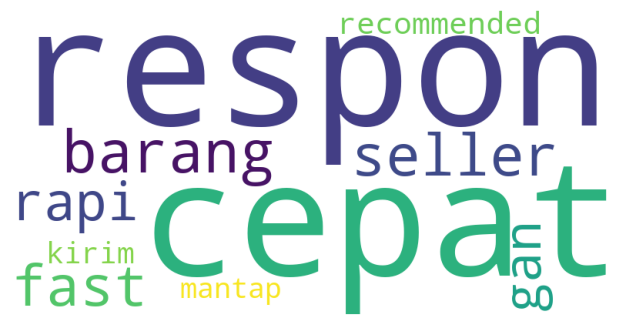


Class: Shipping/Delivery


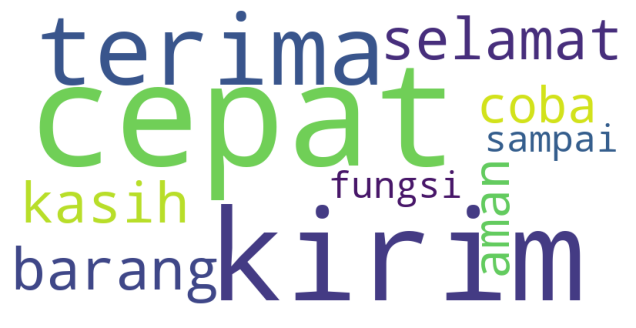

In [19]:
import matplotlib.pyplot as plt
# make it wordcloud graph
from wordcloud import WordCloud

# Function to generate word cloud for each class
def generate_wordcloud_per_class(top_words_per_class):
    for class_label, top_words in top_words_per_class.items():
        wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(top_words)
        # Display the generated image:
        print(f"\nClass: {class_label}")
        plt.figure(figsize = (8, 4))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

# Generate word cloud for each class
generate_wordcloud_per_class(top_words_per_class)



In [23]:
def plot_aspect_distribution(df, aspect):
    df[aspect].value_counts().plot(kind='bar', title=f'{aspect} distribution', figsize=(5, 3))
    plt.show()

def plot_A_column_each_B_column(df, A_column_name, B_column_name):
    df.groupby(A_column_name)[B_column_name].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title(f'{A_column_name} vs {B_column_name}')
    plt.show()

def plot_A_column_each_B_column_sidebyside_version(df, A_column_name, B_column_name):
    temp_group = df.groupby(A_column_name)[B_column_name].value_counts().unstack()
    plt.figure(figsize=(8, 4))

    index =np.arange(temp_group.shape[0])
    bar_width = 0.2
    
    for i in range(temp_group.shape[1]):
        plt.bar(index + i*bar_width, temp_group.iloc[:, i], bar_width, label=temp_group.columns[i])

    # add text annotation corresponding to the value
    for i in range(temp_group.shape[0]):
        for j in range(temp_group.shape[1]):
            plt.text(i + j*bar_width, temp_group.iloc[i, j], temp_group.iloc[i, j], ha='center', va='bottom')
    plt.legend()
    plt.xticks(index + bar_width, temp_group.index)
    plt.xlabel(A_column_name)
    plt.ylabel('Count')
    plt.title(f'{A_column_name} vs {B_column_name}')
    plt.show()